In [3]:

import pandas as pd
df=pd.read_csv("prices.csv",)
df

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"
...,...,...,...,...,...,...
56,23-Sep,"26,700","15,300",4.30%,5.25%,"72,000"
57,23-Oct,"26,800","15,400",4.00%,5.00%,"73,500"
58,23-Nov,"26,900","15,500",3.80%,4.75%,"74,000"
59,23-Dec,"27,000","15,600",3.50%,4.50%,"75,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          60 non-null     object
 1   New Price ($)       60 non-null     object
 2   Used Price ($)      60 non-null     object
 3   Inflation Rate (%)  60 non-null     object
 4   Interest Rate (%)   60 non-null     object
 5   Units Sold          60 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [5]:
df.isnull().sum()

Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Month/Year            0
New Price ($)         0
Used Price ($)        0
Inflation Rate (%)    0
Interest Rate (%)     0
Units Sold            0
dtype: int64

In [8]:
df["New Price ($)"]=df["New Price ($)"].str.replace(",","").astype(float)

In [9]:
df["Used Price ($)"]=df["Used Price ($)"].str.replace(",","").astype(float)

In [10]:
df["Units Sold"]=df["Units Sold"].str.replace(",","").astype(float)

In [11]:
df["Inflation Rate (%)"]=df["Inflation Rate (%)"].str.rstrip("%").astype(float)/100

In [12]:
df["Interest Rate (%)"]=df["Interest Rate (%)"].str.rstrip("%").astype(float)/100

In [13]:
df["Month/Year"]=pd.to_datetime(df["Month/Year"],format="%y-%b")
df.to_csv("data.csv")
df

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,0.016,0.0240,28500.0
1,2019-02-01,25000.0,17900.0,0.015,0.0240,29000.0
2,2019-03-01,25000.0,17800.0,0.019,0.0240,31500.0
3,2019-04-01,25000.0,17700.0,0.020,0.0240,30000.0
4,2019-05-01,25000.0,17600.0,0.018,0.0240,32000.0
5,2019-06-01,25000.0,17500.0,0.016,0.0240,33000.0
6,2019-07-01,25000.0,17400.0,0.018,0.0240,34500.0
7,2019-08-01,25000.0,17300.0,0.017,0.0240,35000.0
8,2019-09-01,25000.0,17200.0,0.015,0.0240,33500.0
9,2019-10-01,25000.0,17100.0,0.018,0.0240,31000.0


In [14]:
df=pd.read_csv("data.csv")
df

,Unnamed: 0,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,0,2019-01-01,25000.0,18000.0,0.016,0.0240,28500.0
1,1,2019-02-01,25000.0,17900.0,0.015,0.0240,29000.0
2,2,2019-03-01,25000.0,17800.0,0.019,0.0240,31500.0
3,3,2019-04-01,25000.0,17700.0,0.020,0.0240,30000.0
4,4,2019-05-01,25000.0,17600.0,0.018,0.0240,32000.0
5,5,2019-06-01,25000.0,17500.0,0.016,0.0240,33000.0
6,6,2019-07-01,25000.0,17400.0,0.018,0.0240,34500.0
7,7,2019-08-01,25000.0,17300.0,0.017,0.0240,35000.0
8,8,2019-09-01,25000.0,17200.0,0.015,0.0240,33500.0
9,9,2019-10-01,25000.0,17100.0,0.018,0.0240,31000.0


In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
plt.plot(df["Month/Year"],df["New Price ($)"],label="New Price")
plt.plot(df["Month/Year"],df["Used Price ($)"],label="Used Price")
plt.title("Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price($)")
plt.legend()
plt.savefig("plot.png")
plt.show()

In [16]:
df.select_dtypes(include=['float64', 'int64']).corr()

,Unnamed: 0,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
Unnamed: 0,1.000000,0.913715,-0.826645,0.689728,0.524598,0.906587
New Price ($),0.913715,1.000000,-0.537668,0.431847,0.699382,0.926648
Used Price ($),-0.826645,-0.537668,1.000000,-0.865135,-0.066867,-0.596805
Inflation Rate (%),0.689728,0.431847,-0.865135,1.000000,0.174232,0.625475
Interest Rate (%),0.524598,0.699382,-0.066867,0.174232,1.000000,0.772562
Units Sold,0.906587,0.926648,-0.596805,0.625475,0.772562,1.000000


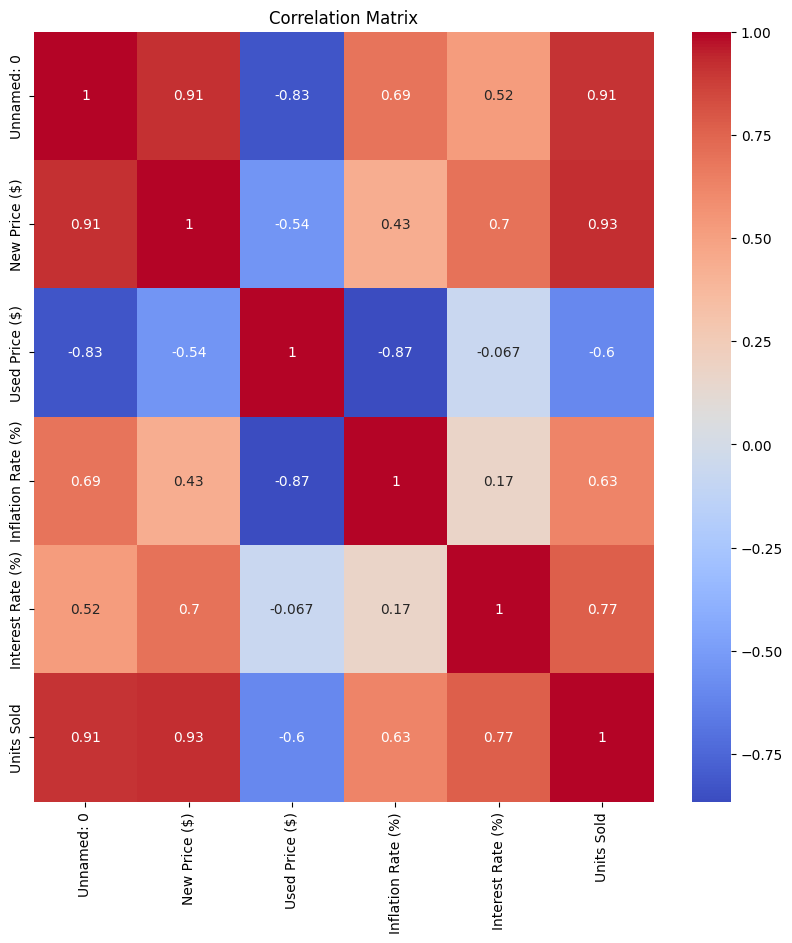

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("heatMap.png")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
X=df[["New Price ($)","Used Price ($)"]]
Y=df["Units Sold"]
model=LinearRegression()
model.fit(X,Y)
prediction=model.predict(X)
print("Prediction for Units Sold:\n",prediction)

Prediction for Units Sold:
 [24514.19553298 24696.17120471 24878.14687643 25060.12254815
 25242.09821988 25424.0738916  25606.04956332 25788.02523505
 25970.00090677 26151.9765785  26333.95225022 26515.92792194
 31771.02992912 31953.00560084 32134.98127256 32316.95694429
 32498.93261601 32680.90828773 32862.88395946 33044.85963118
 33226.83530291 33408.81097463 33590.78664635 33772.76231808
 39027.86432525 39209.83999697 39391.8156687  39573.79134042
 39755.76701214 39937.74268387 40119.71835559 40301.69402732
 40483.66969904 40665.64537076 40847.62104249 41029.59671421
 46284.69872138 46466.67439311 46648.65006483 46830.62573655
 47012.60140828 47194.57708    47376.55275173 49731.14024773
 49549.164576   49367.18890428 51721.77640028 51539.80072856
 56248.97572056 56067.00004884 58421.58754484 60776.17504084
 63130.76253684 65485.35003284 67839.93752884 70194.52502484
 72549.11252084 74903.70001685 77258.28751285 79612.87500885]


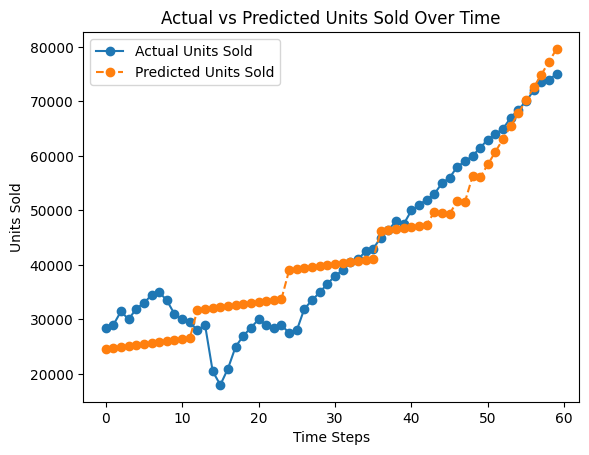

In [22]:
import matplotlib.pyplot as plt
df["Predicted Units Sold"]=prediction
plt.plot(df.index,df["Units Sold"],label="Actual Units Sold",marker="o")
plt.plot(df.index,df["Predicted Units Sold"],label="Predicted Units Sold",linestyle="--",marker="o")
plt.xlabel("Time Steps")
plt.ylabel("Units Sold")
plt.title("Actual vs Predicted Units Sold Over Time")
plt.savefig("Predicted.png")
plt.legend()
plt.show()

In [21]:
df

,Unnamed: 0,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold,Predicted Units Sold
0,0,2019-01-01,25000.0,18000.0,0.016,0.0240,28500.0,24514.195533
1,1,2019-02-01,25000.0,17900.0,0.015,0.0240,29000.0,24696.171205
2,2,2019-03-01,25000.0,17800.0,0.019,0.0240,31500.0,24878.146876
3,3,2019-04-01,25000.0,17700.0,0.020,0.0240,30000.0,25060.122548
4,4,2019-05-01,25000.0,17600.0,0.018,0.0240,32000.0,25242.098220
5,5,2019-06-01,25000.0,17500.0,0.016,0.0240,33000.0,25424.073892
6,6,2019-07-01,25000.0,17400.0,0.018,0.0240,34500.0,25606.049563
7,7,2019-08-01,25000.0,17300.0,0.017,0.0240,35000.0,25788.025235
8,8,2019-09-01,25000.0,17200.0,0.015,0.0240,33500.0,25970.000907
9,9,2019-10-01,25000.0,17100.0,0.018,0.0240,31000.0,26151.976578
